In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import random

maxx=10000000

In [2]:
avg1=np.array([43019,41585,39880,41646,38679,48062,41005,42348,41579,47400])
avg11=avg1.mean()
avg2=np.array([37659,39394,38691,44686,41277,45334,42644,45078,45678,42302])
avg21=avg2.mean()
e=avg11-avg21
a=avg1-avg21
a=np.sum(a*a)
e=e/math.sqrt(a)*math.sqrt(10)
print(e)

0.08593124411842491


In [3]:
s=list(range(100))
random.shuffle(s)
np.array(s)


array([75, 40, 31, 62, 54, 14, 89, 69, 34,  7, 70, 63, 29, 98, 30, 61, 86,
       20, 90,  3,  0, 47, 80, 52, 99,  4,  8, 65, 77, 46, 13, 10, 48, 50,
        9, 59, 22, 60, 85, 25, 81, 91, 56, 94,  5, 87, 11,  2, 39, 66, 43,
       16, 28, 53, 84, 57, 18, 37, 95, 19, 27, 88, 24, 36, 33, 78, 97, 93,
       21,  6, 23, 73, 32, 96, 44, 82, 51,  1, 38, 76, 17, 74, 67, 12, 83,
       45, 42, 41, 55, 79, 92, 58, 71, 26, 68, 64, 35, 49, 15, 72])

In [4]:
class Chart:
    def __init__(self):
        self.fig, self.ax = plt.subplots(1, 1)
    
    def plot(self, episode_rewards, x, y):
        self.ax.clear()
        self.ax.plot(episode_rewards)
        self.ax.set_xlabel(x)
        self.ax.set_ylabel(y)
        self.fig.canvas.draw()

In [5]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = f.read().split('\n')
    data=data[6:-2]
    data = [t.split(' ') for t in data]
    data = [[int(i) for i in t] for t in data]
    return data
        
def TSPmatrix(filename):
    data=read_data(filename)
    l=len(data)
    Tm=np.zeros((l,l))
    fpm=np.zeros((l,l))
    for i in range(l):
        for j in range(i,l):
            Tm[i,j]=math.sqrt((data[i][1]-data[j][1])**2+(data[i][2]-data[j][2])**2)
            Tm[j,i]=Tm[i,j]
    return Tm,fpm,l

# 旅行商禁忌搜索类

In [6]:
class TSTSP:
    def __init__(self,filename,n,Tlen,s0=False,fp=0):
        self.Tm,self.fpm,self.city=TSPmatrix(filename)#距离矩阵 频率矩阵 城市数量
        self.Tlen=Tlen
        self.T=[]
        self.n=n
        self.fp=fp
        self.minn=maxx
        if s0:
            self.s0=s0
        else:
            self.s0=list(range(self.city))
    
    def compute(self,s):#计算回报
        result=0
        for i in range(self.city):
            result=result+self.Tm[s[i-1],s[i]]
        return result
    
    def Searchfp(self,s,s1):
        return self.fp*self.fpm[s,s1]
    
    def opt2(self,s):#邻域搜索
        action=[]
        tem=[]
        minn1=maxx
        v=self.compute(s)
        for i in range(self.city):
            for j in range(i+1,self.city):
                
                v1=v-self.Tm[s[i-1],s[i]]-self.Tm[s[j],s[(j+1)%self.city]]+ \
                self.Tm[s[i-1],s[j]] + self.Tm[s[i],s[(j+1)%self.city]]
                if (j-i)!=1 and not (i==0 and j==self.city-1):
                    v1=v1-self.Tm[s[i],s[(j+1)%self.city]]-self.Tm[s[j-1],s[j]]+ \
                    self.Tm[s[j],s[i+1]]+self.Tm[s[j-1],s[i]]
                #print(i,j)
                v1+=self.Searchfp(s[i],s[j])
                if (((s[i],s[j]) in self.T) or ((s[j],s[i]) in self.T)) and v1>=self.minn:
                    continue
                if v1<minn1:
                    action=[s[i],s[j],v1]
                    tem=[i,j]
                    minn1=v1
        s[tem[0]],s[tem[1]]=s[tem[1]],s[tem[0]]
        return s,action
    
    def train(self,code=False):
        #t=[]
        result=[]
        s=self.s0
        for i in range(self.n):
            s,action=self.opt2(s)
            #print(action)
            self.fpm[action[0],action[1]]+=1
            self.fpm[action[1],action[0]]+=1
            if action[2]<self.minn:
                self.minn=action[2]
            if len(self.T)<self.Tlen:
                self.T.append((action[0],action[1]))
            else:
                self.T[i%self.Tlen]=(action[0],action[1])
            if code:
                result.append(action[2])
                #t.append(s.copy())
        return result,s

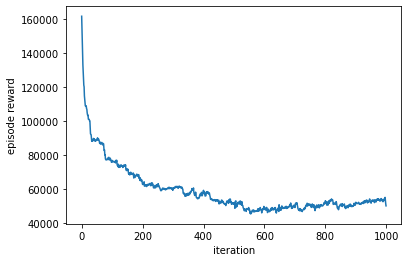

In [7]:
s=list(range(100))
random.shuffle(s)
np.array(s)
s1=s.copy()
a=TSTSP('kroA100.tsp',1000,100,s0=s,fp=2000)#fp我也不知道怎么设置，从体量来看，这个题目目标值大约在100000到200000，所以1%为1000
ac,s=a.train(True)
chart=Chart()
chart.plot(ac,'iteration','episode reward')

In [8]:
print(np.array(s))
print(a.compute(s))
print(a.minn)

[90 97 46 16 31 10 20 14 59 26 34 61 22 76 54 82 56  9 23 93 52 87 15 69
 18 96 41 91 57 49 24  8 85  2 29 11 19 50 63 39 53 94 12 75 32 95 51 70
 42 13 40 99 81  1 38 84 43 67 48  5 21 37 17 78 89 83 73 35 71 58 98  7
 79 30 88 66 68 72 80 60 86 33 28  4 77 36 47 45  6 64 25  3 65 74 55 62
  0 92 27 44]
52841.65049417752
45470.00440131988


In [10]:
#不使用频率表
t_start=time.time()
a=TSTSP('kroA100.tsp',1000,100,s0=s1,fp=0)#fp我也不知道怎么设置，从体量来看，这个题目目标值大约在100000到200000，所以1%为1000
ac,s=a.train(True)
t_end=time.time()
t=t_end-t_start
print('消耗时间为:',t,'s')

消耗时间为: 70.67784547805786 s


输出某参数下结果随迭代次数变化

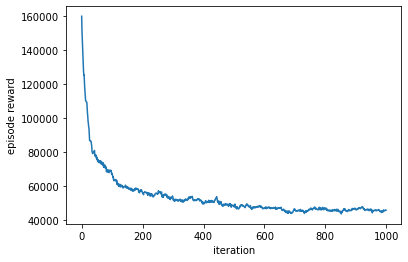

In [11]:
chart=Chart()
chart.plot(ac,'iteration','episode reward')

In [12]:
print(np.array(s))
print(a.compute(s))
print(a.minn)

[45 42 13 99 70 40 51 67 66 88 30  7 41 74 89 18 78 87 21 23 10 76 85 34
 26 19 57 91  0  9 83 96 79 55 64  3 25 65 69 15 93 17 98 37 35 58 71 60
 63 39 72 68 53  1 43 49 81 77 38 84 27 92 46 14 44  8 11 82 33 28 29 36
 75 32 12 94 54 61 59 90 16 31 22 97 62  5 73 20 48 52  4 95 47 80 24 50
 86  6 56  2]
48935.08604826447
43613.28718587395


## 在迭代次数300次下，结果随禁忌表长度变化

In [11]:
r=[]
for i in range(1,150):
    a=TSTSP('kroA100.tsp',300,i,fp=1000)
    ac,s=a.train(True)
    r.append(ac[-1])

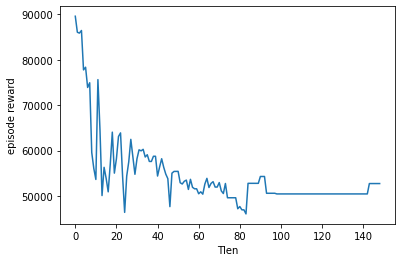

In [12]:
chart=Chart()
chart.plot(r,'Tlen','episode reward')
#可以看出禁忌表长度并不是越大越好，在保证小于迭代次数的条件下，
#设置为1/3到7/15迭代次数会取得不错的效果（平稳段），在4/15迭代次数时会取得全局极小点（可能和初始点选取和频率表阿尔法值有关）

In [24]:
s=[61,69,64,40,42,56,97,75,90,10,11,32,91,45,15,17,59,36,99,38,24,18,94,16,22,70,92,93,51,87,57,20,86,35,27,83,30,96,48,100,41,71,14,85,68,39,5,37,33,76,13,78,52,3,43,7,9,60,23,98,47,49,19,4,65,66,26,54,2,67,1,63,21,74,72,84,79,88,53,6,28,73,44,82,95,50,81,25,89,31,80,8,58,34,29,46,55,12,62,77]
a=TSTSP('kroA100.tsp',200,80,fp=0)
s=[i-1 for i in s]
print(a.compute(s))

41245.11466482204


In [5]:
s=[92,63,6,49,90,10,84,72,21,74,59,17,15,11,32,45,23,98,91,47,93,28,67,58,61,25,81,69,73,50,44,2,54,40,64,68,85,39,30,96,78,52,5,37,33,76,13,95,82,48,100,41,71,14,3,43,46,29,34,83,55,27,35,86,20,12,7,9,87,51,57,62,60,77,1,8,42,89,31,80,56,97,75,19,53,79,18,24,38,36,99,94,88,16,22,70,66,26,65,4,92]
a=TSTSP('kroA100.tsp',200,80,fp=0)
s=[i-1 for i in s]
print(a.compute(s))

23360.50968373368


In [7]:
#使用频率表
r=[]
n=30
for i in range(n):
    s=list(range(100))
    random.shuffle(s)
    np.array(s)

    t_start=time.time()
    a=TSTSP('kroA100.tsp',400,80,s0=s,fp=1000)#fp我也不知道怎么设置，从体量来看，这个题目目标值大约在100000到200000，所以1%为1000
    ac,s=a.train(True)
    r.append(ac[-1])
    t_end=time.time()
    t=t_end-t_start
    print('循环次数',i,'消耗时间为:',t,'s')
r=np.array(r)
e=r.mean()
r=r-e
r=r*r
s=math.sqrt(r.sum()/n)
ttest=(e-23360)/s*math.sqrt(n)
print('t检测值为',ttest)

循环次数 0 消耗时间为: 14.114550352096558 s
循环次数 1 消耗时间为: 14.123862504959106 s
循环次数 2 消耗时间为: 13.974427938461304 s
循环次数 3 消耗时间为: 14.0742506980896 s
循环次数 4 消耗时间为: 14.389610052108765 s
循环次数 5 消耗时间为: 13.926072359085083 s
循环次数 6 消耗时间为: 14.154562711715698 s
循环次数 7 消耗时间为: 14.03341031074524 s
循环次数 8 消耗时间为: 14.001611232757568 s
循环次数 9 消耗时间为: 14.439754247665405 s
循环次数 10 消耗时间为: 14.193278312683105 s
循环次数 11 消耗时间为: 14.06968355178833 s
循环次数 12 消耗时间为: 14.070913314819336 s
循环次数 13 消耗时间为: 14.445085525512695 s
循环次数 14 消耗时间为: 14.288939476013184 s
循环次数 15 消耗时间为: 14.146945714950562 s
循环次数 16 消耗时间为: 14.422068119049072 s
循环次数 17 消耗时间为: 15.093415975570679 s
循环次数 18 消耗时间为: 14.738795757293701 s
循环次数 19 消耗时间为: 14.3712317943573 s
循环次数 20 消耗时间为: 14.268358945846558 s
循环次数 21 消耗时间为: 14.242873191833496 s
循环次数 22 消耗时间为: 14.190942764282227 s
循环次数 23 消耗时间为: 14.544574975967407 s
循环次数 24 消耗时间为: 14.15265703201294 s
循环次数 25 消耗时间为: 14.208523988723755 s
循环次数 26 消耗时间为: 14.486984252929688 s
循环次数 27 消耗时间为: 14.619399785995483 s
循环次数 28 消